# HR Analytics 

## To Predict Employees Behaviour and check whether they leave the organization or not

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
df=pd.read_csv('HR_comma_sep.csv')

### Understanding Data

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Feature Engineering & Feature Selection

In [9]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
department=df[['Department']]
department=pd.get_dummies(department,drop_first=True)
department.head()

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [11]:
department

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [12]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
salary=df[['salary']]
salary=pd.get_dummies(salary,drop_first=True)
salary.head()

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [14]:
df1=pd.concat([df,department,salary],axis=1)

In [15]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [16]:
df1.drop(['Department','salary'],axis=1,inplace=True)

In [17]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


<AxesSubplot:>

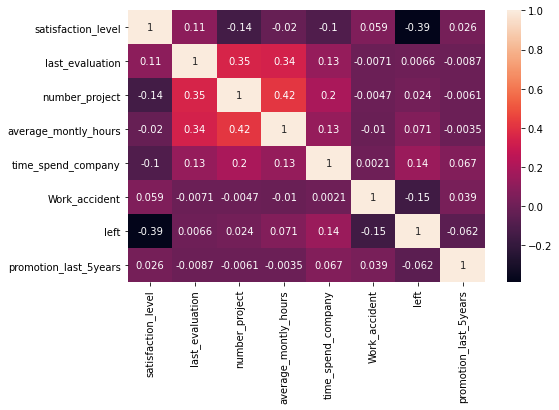

In [18]:
plt.figure(figsize=(8,5))
data_corr=df.corr()
sns.heatmap(data_corr,annot=True)

In [19]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [20]:
X=df1[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium']]

y=df1['left']

In [21]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


In [22]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [23]:
df1['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
X_train.shape, X_test.shape

((10499, 18), (4500, 18))

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
pred=lr.predict(X_test)

In [28]:
lr.score(X_train,y_train)

0.7966472997428327

In [29]:
lr.score(X_test,y_test)

0.7991111111111111

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[3187  244]
 [ 660  409]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3431
           1       0.63      0.38      0.48      1069

    accuracy                           0.80      4500
   macro avg       0.73      0.66      0.68      4500
weighted avg       0.78      0.80      0.78      4500

0.7991111111111111


In [32]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [33]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
X_train

array([[-0.45420748,  1.43017273,  0.15808201, ..., -0.47292671,
         1.02108129, -0.86761431],
       [-2.10339435,  1.31306313,  2.59882168, ..., -0.47292671,
        -0.97935395,  1.15258588],
       [ 1.27542752, -0.03369732,  0.15808201, ..., -0.47292671,
        -0.97935395,  1.15258588],
       ...,
       [ 0.55139426,  1.02028912,  0.9716619 , ..., -0.47292671,
        -0.97935395,  1.15258588],
       [-2.10339435,  0.66896031,  1.78524179, ..., -0.47292671,
        -0.97935395,  1.15258588],
       [ 1.35587566,  0.72751511, -0.65549789, ..., -0.47292671,
        -0.97935395,  1.15258588]])

In [35]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression()
lr1.fit(X_train,y_train)

LogisticRegression()

In [36]:
pred1=lr1.predict(X_test)

In [37]:
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
print(accuracy_score(y_test,pred1))

[[3183  248]
 [ 689  380]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3431
           1       0.61      0.36      0.45      1069

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

0.7917777777777778
